# 주택도시보증공사_전국 신규 민간아파트 분양가격 동향

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [3]:
df_house = pd.read_csv("주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210315.csv",encoding='cp949')
df_house.head()

,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879


In [4]:
df_house.tail()

,지역명,규모구분,연도,월,분양가격(㎡)
5605,제주,모든면적,2021,3,7199
5606,제주,전용면적 60㎡이하,2021,3,4686
5607,제주,전용면적 60㎡초과 85㎡이하,2021,3,7180
5608,제주,전용면적 85㎡초과 102㎡이하,2021,3,NaN
5609,제주,전용면적 102㎡초과,2021,3,7727


In [5]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      5610 non-null   object
 1   규모구분     5610 non-null   object
 2   연도       5610 non-null   int64 
 3   월        5610 non-null   int64 
 4   분양가격(㎡)  5170 non-null   object
dtypes: int64(2), object(3)
memory usage: 219.3+ KB


#### 널값 확인

In [6]:
df_house.isnull().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    440
dtype: int64

<AxesSubplot:>

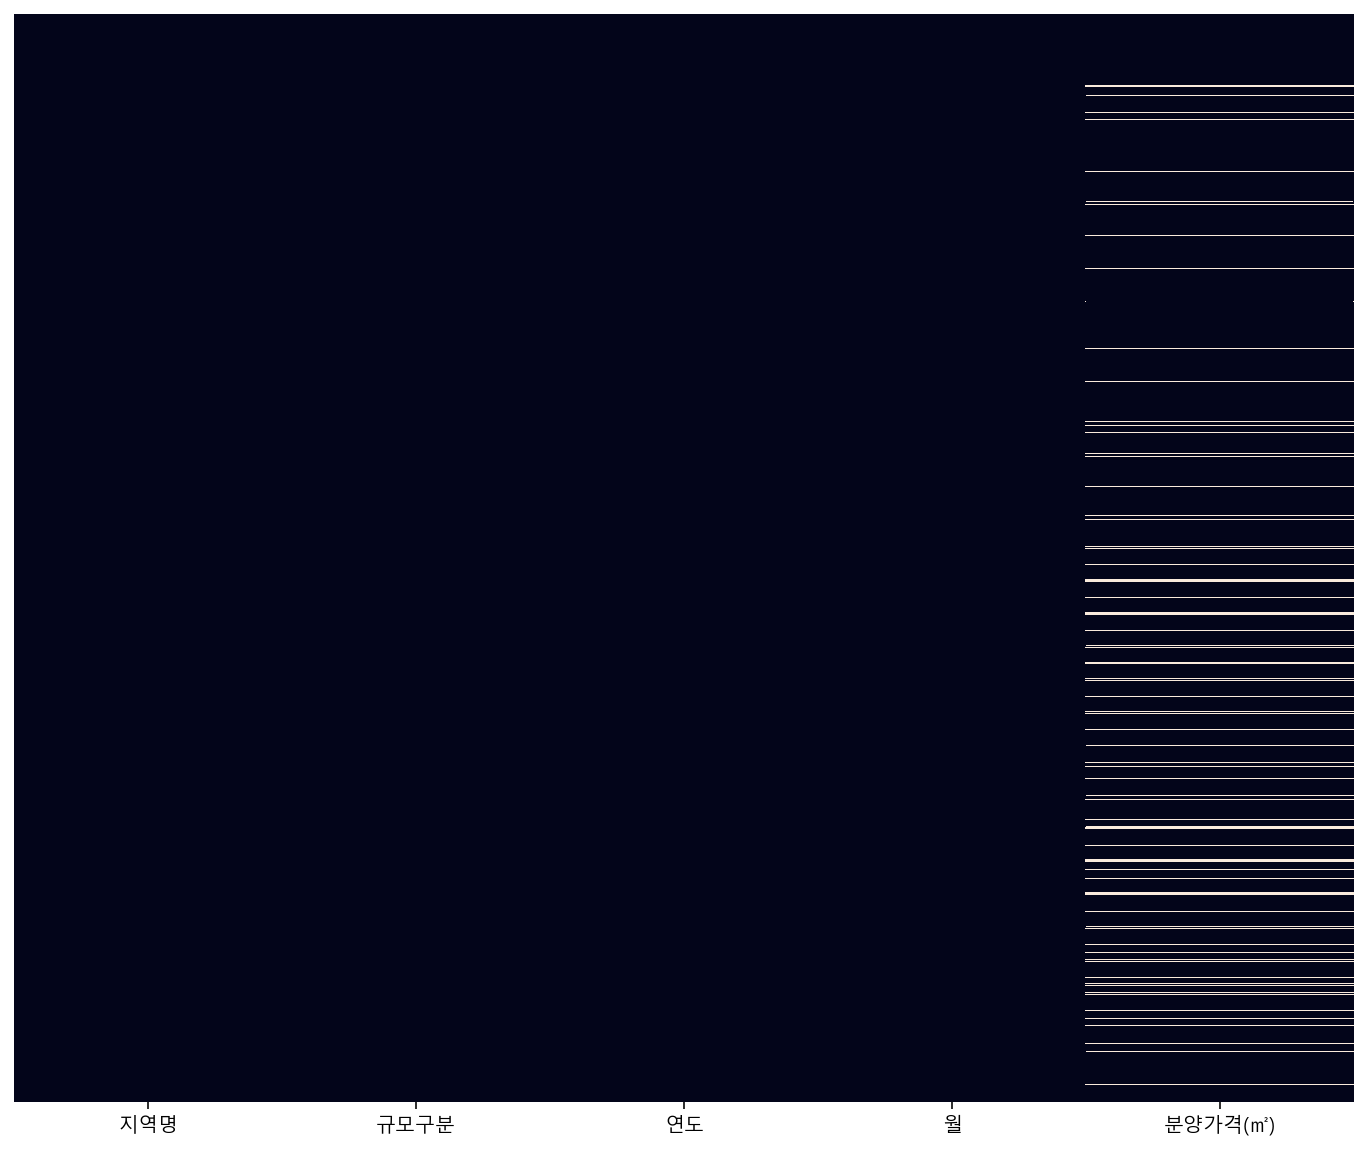

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df_house.isnull(),yticklabels=False,cbar=False)

#### 컬럼 내용 확인

In [8]:
cols = df_house.columns
for i in cols:
    print(i,':\n')
    print(df_house[i].value_counts(),'\n')

지역명 :

광주    330
제주    330
세종    330
경남    330
서울    330
인천    330
대전    330
경북    330
울산    330
강원    330
충북    330
경기    330
대구    330
전남    330
충남    330
전북    330
부산    330
Name: 지역명, dtype: int64 

규모구분 :

전용면적 60㎡이하           1122
전용면적 102㎡초과          1122
전용면적 85㎡초과 102㎡이하    1122
전용면적 60㎡초과 85㎡이하     1122
모든면적                 1122
Name: 규모구분, dtype: int64 

연도 :

2016    1020
2020    1020
2017    1020
2018    1020
2019    1020
2021     255
2015     255
Name: 연도, dtype: int64 

월 :

12    510
1     510
2     510
10    510
3     510
11    510
4     425
8     425
5     425
9     425
6     425
7     425
Name: 월, dtype: int64 

분양가격(㎡) :

3395     18
2221     17
2667     17
2743     16
         16
         ..
7369      1
2,763     1
3854      1
3576      1
6450      1
Name: 분양가격(㎡), Length: 2114, dtype: int64 



## 데이터 전처리

#### 분양가격 평당 분양가격으로 변경해줌

In [9]:
#### pd.to_numeric 을 통해 데이터의 타입을 변경
df_house['분양가격'] = pd.to_numeric(df_house['분양가격(㎡)'], errors='coerce')
df_house.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격
0,서울,모든면적,2015,10,5841,5841.0
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0


In [10]:
#### 분양가격 평당 분양가격으로 변경해줌
df_house['평당분양가격'] = df_house['분양가격'] * 3.3

In [11]:
df_house['평당분양가격']

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
5605    23756.7
5606    15463.8
5607    23694.0
5608        NaN
5609    25499.1
Name: 평당분양가격, Length: 5610, dtype: float64

In [12]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역명      5610 non-null   object 
 1   규모구분     5610 non-null   object 
 2   연도       5610 non-null   int64  
 3   월        5610 non-null   int64  
 4   분양가격(㎡)  5170 non-null   object 
 5   분양가격     5078 non-null   float64
 6   평당분양가격   5078 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 306.9+ KB


#### 이제 규모구분 컬럼내용 변경필요

In [13]:
df_house['규모구분'].value_counts()

전용면적 60㎡이하           1122
전용면적 102㎡초과          1122
전용면적 85㎡초과 102㎡이하    1122
전용면적 60㎡초과 85㎡이하     1122
모든면적                 1122
Name: 규모구분, dtype: int64

In [14]:
df_house['전용면적'] = df_house['규모구분'].str.replace('전용면적',"")
df_house['전용면적'] = df_house['전용면적'].str.replace('초과','~')
df_house['전용면적'] = df_house['전용면적'].str.replace('이하','')
df_house['전용면적'] = df_house['전용면적'].str.replace(' ','').str.strip()
df_house['전용면적']

0           모든면적
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
5605        모든면적
5606         60㎡
5607     60㎡~85㎡
5608    85㎡~102㎡
5609       102㎡~
Name: 전용면적, Length: 5610, dtype: object

In [15]:
df_house.head()

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,5841,5841.0,19275.3,모든면적
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6,60㎡
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6,60㎡~85㎡
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3,85㎡~102㎡
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7,102㎡~


#### 필요없는 컬럼 제거

In [16]:
df_house = df_house.drop(['규모구분','분양가격(㎡)'],axis=1)
df_house

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,모든면적
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
5605,제주,2021,3,7199.0,23756.7,모든면적
5606,제주,2021,3,4686.0,15463.8,60㎡
5607,제주,2021,3,7180.0,23694.0,60㎡~85㎡
5608,제주,2021,3,NaN,NaN,85㎡~102㎡


In [17]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5610 entries, 0 to 5609
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     5610 non-null   object 
 1   연도      5610 non-null   int64  
 2   월       5610 non-null   int64  
 3   분양가격    5078 non-null   float64
 4   평당분양가격  5078 non-null   float64
 5   전용면적    5610 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 263.1+ KB


#### 분양가격은 평당분양가격으로 처리해줘서 필요없음

In [18]:
df_house = df_house.drop('분양가격',axis = 1).copy()

In [19]:
df_house

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
...,...,...,...,...,...
5605,제주,2021,3,23756.7,모든면적
5606,제주,2021,3,15463.8,60㎡
5607,제주,2021,3,23694.0,60㎡~85㎡
5608,제주,2021,3,NaN,85㎡~102㎡


#### 모든 면적값은 어짜피 다른 전용면적에서 다 처리해줘서 필요없다고 판단하여 제거

In [20]:
df_house = df_house[df_house['전용면적'] != '모든면적'].copy()
df_house

,지역명,연도,월,평당분양가격,전용면적
1,서울,2015,10,18651.6,60㎡
2,서울,2015,10,19410.6,60㎡~85㎡
3,서울,2015,10,18879.3,85㎡~102㎡
4,서울,2015,10,19400.7,102㎡~
6,인천,2015,10,11510.4,60㎡
...,...,...,...,...,...
5604,경남,2021,3,10863.6,102㎡~
5606,제주,2021,3,15463.8,60㎡
5607,제주,2021,3,23694.0,60㎡~85㎡
5608,제주,2021,3,NaN,85㎡~102㎡


#### 2016년 이후 자료부터 비교할거라 2015년 자료는 없에줌

In [21]:
df_house = df_house[df_house['연도'] != 2015].copy()
df_house

,지역명,연도,월,평당분양가격,전용면적
256,서울,2016,1,21209.1,60㎡
257,서울,2016,1,19918.8,60㎡~85㎡
258,서울,2016,1,21492.9,85㎡~102㎡
259,서울,2016,1,21618.3,102㎡~
261,인천,2016,1,10982.4,60㎡
...,...,...,...,...,...
5604,경남,2021,3,10863.6,102㎡~
5606,제주,2021,3,15463.8,60㎡
5607,제주,2021,3,23694.0,60㎡~85㎡
5608,제주,2021,3,NaN,85㎡~102㎡


In [22]:
df_house['연도'].value_counts()

2016    816
2020    816
2017    816
2018    816
2019    816
2021    204
Name: 연도, dtype: int64

#### 전처리한 컬럼 내용 확인

In [23]:
cols = df_house.columns
for i in cols:
    print(i,':\n')
    print(df_house[i].value_counts(),'\n')

지역명 :

경기    252
대전    252
부산    252
전남    252
세종    252
경남    252
서울    252
인천    252
충남    252
충북    252
전북    252
경북    252
제주    252
강원    252
광주    252
울산    252
대구    252
Name: 지역명, dtype: int64 

연도 :

2016    816
2020    816
2017    816
2018    816
2019    816
2021    204
Name: 연도, dtype: int64 

월 :

1     408
2     408
3     408
4     340
8     340
12    340
5     340
9     340
6     340
10    340
7     340
11    340
Name: 월, dtype: int64 

평당분양가격 :

11203.5    18
8801.1     17
7329.3     16
10645.8    15
12972.3    14
           ..
13922.7     1
13434.3     1
12490.5     1
14091.0     1
13381.5     1
Name: 평당분양가격, Length: 1610, dtype: int64 

전용면적 :

60㎡~85㎡     1071
60㎡         1071
102㎡~       1071
85㎡~102㎡    1071
Name: 전용면적, dtype: int64 



In [24]:
korea = df_house['지역명'].unique()
korea

array(['서울', '인천', '경기', '부산', '대구', '광주', '대전', '울산', '세종', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

#### 지역별 평당분양가격 널 갯수 확인

In [25]:
for i in korea:
    j = df_house[df_house['지역명'] == i].copy()
    print(i,' 지역 널 갯수는 :', end=' ')
    print(j['평당분양가격'].isnull().sum(),'\n')

서울  지역 널 갯수는 : 4 

인천  지역 널 갯수는 : 8 

경기  지역 널 갯수는 : 4 

부산  지역 널 갯수는 : 4 

대구  지역 널 갯수는 : 12 

광주  지역 널 갯수는 : 51 

대전  지역 널 갯수는 : 81 

울산  지역 널 갯수는 : 115 

세종  지역 널 갯수는 : 53 

강원  지역 널 갯수는 : 16 

충북  지역 널 갯수는 : 6 

충남  지역 널 갯수는 : 22 

전북  지역 널 갯수는 : 6 

전남  지역 널 갯수는 : 10 

경북  지역 널 갯수는 : 25 

경남  지역 널 갯수는 : 13 

제주  지역 널 갯수는 : 58 



#### 위에서 지역별로 평당분양가격 데이터가 252개인거 확인가능 그래서 널값이 252의 약10% 20개 이하인 지역만 가져와서 전처리 할예정 집값의 기준을 마음대로 설정할수 없어 널값 최대한 줄이기 위함

In [26]:
for i in korea:
    j = df_house[df_house['지역명'] == i].copy()
    if j['평당분양가격'].isnull().sum() <= 20:
        print(i,' 지역 널 갯수는 :', end=' ')
        print(j['평당분양가격'].isnull().sum(),'\n')

서울  지역 널 갯수는 : 4 

인천  지역 널 갯수는 : 8 

경기  지역 널 갯수는 : 4 

부산  지역 널 갯수는 : 4 

대구  지역 널 갯수는 : 12 

강원  지역 널 갯수는 : 16 

충북  지역 널 갯수는 : 6 

전북  지역 널 갯수는 : 6 

전남  지역 널 갯수는 : 10 

경남  지역 널 갯수는 : 13 



In [27]:
df_house_dosi = df_house.loc[(df_house['지역명'] == '서울') | (df_house['지역명'] == '인천') |
                             (df_house['지역명'] == '경기') | (df_house['지역명'] == '부산') |
                             (df_house['지역명'] == '대구') | (df_house['지역명'] == '강원') |
                             (df_house['지역명'] == '충북') | (df_house['지역명'] == '전북') |
                             (df_house['지역명'] == '전남') | (df_house['지역명'] == '경남') ].copy()

In [28]:
df_house_dosi.isnull().sum()

지역명        0
연도         0
월          0
평당분양가격    83
전용면적       0
dtype: int64

In [29]:
df_house_dosi.index

Int64Index([ 256,  257,  258,  259,  261,  262,  263,  264,  266,  267,
            ...
            5588, 5589, 5591, 5592, 5593, 5594, 5601, 5602, 5603, 5604],
           dtype='int64', length=2520)

In [30]:
df_house_dosi.head()

,지역명,연도,월,평당분양가격,전용면적
256,서울,2016,1,21209.1,60㎡
257,서울,2016,1,19918.8,60㎡~85㎡
258,서울,2016,1,21492.9,85㎡~102㎡
259,서울,2016,1,21618.3,102㎡~
261,인천,2016,1,10982.4,60㎡


## 지역별로 나누어서 평당분양가격 전처리 할 예정

#### null값 처리 해주기 위한 함수 2016년2월 까지 널값이 없는경우 이 함수 쓰면 널값 전처리 해주게 만듦
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [31]:
def dosi_house_price(house):
    for i in house[house['평당분양가격'].isnull()].index:
        house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())
    return house

### 서울

In [32]:
df_house_seoul = df_house_dosi[df_house_dosi['지역명'] == '서울'].copy()
df_house_seoul.head()

,지역명,연도,월,평당분양가격,전용면적
256,서울,2016,1,21209.1,60㎡
257,서울,2016,1,19918.8,60㎡~85㎡
258,서울,2016,1,21492.9,85㎡~102㎡
259,서울,2016,1,21618.3,102㎡~
341,서울,2016,2,21245.4,60㎡


In [33]:
df_house_seoul = df_house_seoul.reset_index()
df_house_seoul

,index,지역명,연도,월,평당분양가격,전용면적
0,256,서울,2016,1,21209.1,60㎡
1,257,서울,2016,1,19918.8,60㎡~85㎡
2,258,서울,2016,1,21492.9,85㎡~102㎡
3,259,서울,2016,1,21618.3,102㎡~
4,341,서울,2016,2,21245.4,60㎡
...,...,...,...,...,...,...
247,5444,서울,2021,2,31287.3,102㎡~
248,5526,서울,2021,3,28637.4,60㎡
249,5527,서울,2021,3,25964.4,60㎡~85㎡
250,5528,서울,2021,3,29508.6,85㎡~102㎡


In [34]:
df_house_seoul = df_house_seoul.reset_index()
df_house_seoul

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,256,서울,2016,1,21209.1,60㎡
1,1,257,서울,2016,1,19918.8,60㎡~85㎡
2,2,258,서울,2016,1,21492.9,85㎡~102㎡
3,3,259,서울,2016,1,21618.3,102㎡~
4,4,341,서울,2016,2,21245.4,60㎡
...,...,...,...,...,...,...,...
247,247,5444,서울,2021,2,31287.3,102㎡~
248,248,5526,서울,2021,3,28637.4,60㎡
249,249,5527,서울,2021,3,25964.4,60㎡~85㎡
250,250,5528,서울,2021,3,29508.6,85㎡~102㎡


In [35]:
df_house_seoul = df_house_seoul.drop('index',axis = 1).copy()

In [36]:
df_house_seoul.rename(columns = {'level_0' : 'index'}, inplace = True)

In [37]:
df_house_seoul

,index,지역명,연도,월,평당분양가격,전용면적
0,0,서울,2016,1,21209.1,60㎡
1,1,서울,2016,1,19918.8,60㎡~85㎡
2,2,서울,2016,1,21492.9,85㎡~102㎡
3,3,서울,2016,1,21618.3,102㎡~
4,4,서울,2016,2,21245.4,60㎡
...,...,...,...,...,...,...
247,247,서울,2021,2,31287.3,102㎡~
248,248,서울,2021,3,28637.4,60㎡
249,249,서울,2021,3,25964.4,60㎡~85㎡
250,250,서울,2021,3,29508.6,85㎡~102㎡


In [38]:
df_house_seoul[df_house_seoul['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,서울,2017,11,NaN,60㎡
89,89,서울,2017,11,NaN,60㎡~85㎡
90,90,서울,2017,11,NaN,85㎡~102㎡
91,91,서울,2017,11,NaN,102㎡~


In [39]:
# df_house_seoul[df_house_seoul['index'] == 0]['평당분양가격']
df_house_seoul[df_house_seoul['index'] == 0]

,index,지역명,연도,월,평당분양가격,전용면적
0,0,서울,2016,1,21209.1,60㎡


In [40]:
df_house_seoul['평당분양가격'][0] - df_house_seoul['평당분양가격'][4]

-36.29999999999927

#### 앞의 함수 이용 널값이 2017년 자료 밖에 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [41]:
dosi_house_price(df_house_seoul)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,서울,2016,1,21209.1,60㎡
1,1,서울,2016,1,19918.8,60㎡~85㎡
2,2,서울,2016,1,21492.9,85㎡~102㎡
3,3,서울,2016,1,21618.3,102㎡~
4,4,서울,2016,2,21245.4,60㎡
...,...,...,...,...,...,...
247,247,서울,2021,2,31287.3,102㎡~
248,248,서울,2021,3,28637.4,60㎡
249,249,서울,2021,3,25964.4,60㎡~85㎡
250,250,서울,2021,3,29508.6,85㎡~102㎡


In [42]:
df_house_seoul.isnull().sum()

index     0
지역명       0
연도        0
월         0
평당분양가격    0
전용면적      0
dtype: int64

### 인천

In [43]:
df_house_incheon = df_house_dosi[df_house_dosi['지역명'] == '인천'].copy()
df_house_incheon.head()

,지역명,연도,월,평당분양가격,전용면적
261,인천,2016,1,10982.4,60㎡
262,인천,2016,1,10263.0,60㎡~85㎡
263,인천,2016,1,11698.5,85㎡~102㎡
264,인천,2016,1,11246.4,102㎡~
346,인천,2016,2,10982.4,60㎡


In [44]:
df_house_incheon = df_house_incheon.reset_index().reset_index()
df_house_incheon

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,261,인천,2016,1,10982.4,60㎡
1,1,262,인천,2016,1,10263.0,60㎡~85㎡
2,2,263,인천,2016,1,11698.5,85㎡~102㎡
3,3,264,인천,2016,1,11246.4,102㎡~
4,4,346,인천,2016,2,10982.4,60㎡
...,...,...,...,...,...,...,...
247,247,5449,인천,2021,2,19974.9,102㎡~
248,248,5531,인천,2021,3,15840.0,60㎡
249,249,5532,인천,2021,3,15572.7,60㎡~85㎡
250,250,5533,인천,2021,3,16067.7,85㎡~102㎡


In [45]:
df_house_incheon = df_house_incheon.drop('index',axis = 1).copy()

In [46]:
df_house_incheon.rename(columns = {'level_0' : 'index'}, inplace = True)

In [47]:
df_house_incheon

,index,지역명,연도,월,평당분양가격,전용면적
0,0,인천,2016,1,10982.4,60㎡
1,1,인천,2016,1,10263.0,60㎡~85㎡
2,2,인천,2016,1,11698.5,85㎡~102㎡
3,3,인천,2016,1,11246.4,102㎡~
4,4,인천,2016,2,10982.4,60㎡
...,...,...,...,...,...,...
247,247,인천,2021,2,19974.9,102㎡~
248,248,인천,2021,3,15840.0,60㎡
249,249,인천,2021,3,15572.7,60㎡~85㎡
250,250,인천,2021,3,16067.7,85㎡~102㎡


In [48]:
df_house_incheon[df_house_incheon['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,인천,2017,11,NaN,60㎡
89,89,인천,2017,11,NaN,60㎡~85㎡
90,90,인천,2017,11,NaN,85㎡~102㎡
91,91,인천,2017,11,NaN,102㎡~
119,119,인천,2018,6,NaN,102㎡~
123,123,인천,2018,7,NaN,102㎡~
127,127,인천,2018,8,NaN,102㎡~
131,131,인천,2018,9,NaN,102㎡~


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [49]:
dosi_house_price(df_house_incheon)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,인천,2016,1,10982.4,60㎡
1,1,인천,2016,1,10263.0,60㎡~85㎡
2,2,인천,2016,1,11698.5,85㎡~102㎡
3,3,인천,2016,1,11246.4,102㎡~
4,4,인천,2016,2,10982.4,60㎡
...,...,...,...,...,...,...
247,247,인천,2021,2,19974.9,102㎡~
248,248,인천,2021,3,15840.0,60㎡
249,249,인천,2021,3,15572.7,60㎡~85㎡
250,250,인천,2021,3,16067.7,85㎡~102㎡


In [50]:
df_house_incheon[df_house_incheon['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 경기

In [51]:
df_house_gyeonggi = df_house_dosi[df_house_dosi['지역명'] == '경기'].copy()
df_house_gyeonggi.head()

,지역명,연도,월,평당분양가격,전용면적
266,경기,2016,1,10866.9,60㎡
267,경기,2016,1,10932.9,60㎡~85㎡
268,경기,2016,1,11385.0,85㎡~102㎡
269,경기,2016,1,12705.0,102㎡~
351,경기,2016,2,10870.2,60㎡


In [52]:
df_house_gyeonggi = df_house_gyeonggi.reset_index().reset_index()
df_house_gyeonggi

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,266,경기,2016,1,10866.9,60㎡
1,1,267,경기,2016,1,10932.9,60㎡~85㎡
2,2,268,경기,2016,1,11385.0,85㎡~102㎡
3,3,269,경기,2016,1,12705.0,102㎡~
4,4,351,경기,2016,2,10870.2,60㎡
...,...,...,...,...,...,...,...
247,247,5454,경기,2021,2,16876.2,102㎡~
248,248,5536,경기,2021,3,13424.4,60㎡
249,249,5537,경기,2021,3,14437.5,60㎡~85㎡
250,250,5538,경기,2021,3,14836.8,85㎡~102㎡


In [53]:
df_house_gyeonggi = df_house_gyeonggi.drop('index',axis = 1).copy()

In [54]:
df_house_gyeonggi.rename(columns = {'level_0' : 'index'}, inplace = True)

In [55]:
df_house_gyeonggi

,index,지역명,연도,월,평당분양가격,전용면적
0,0,경기,2016,1,10866.9,60㎡
1,1,경기,2016,1,10932.9,60㎡~85㎡
2,2,경기,2016,1,11385.0,85㎡~102㎡
3,3,경기,2016,1,12705.0,102㎡~
4,4,경기,2016,2,10870.2,60㎡
...,...,...,...,...,...,...
247,247,경기,2021,2,16876.2,102㎡~
248,248,경기,2021,3,13424.4,60㎡
249,249,경기,2021,3,14437.5,60㎡~85㎡
250,250,경기,2021,3,14836.8,85㎡~102㎡


In [56]:
df_house_gyeonggi[df_house_gyeonggi['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,경기,2017,11,NaN,60㎡
89,89,경기,2017,11,NaN,60㎡~85㎡
90,90,경기,2017,11,NaN,85㎡~102㎡
91,91,경기,2017,11,NaN,102㎡~


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [57]:
dosi_house_price(df_house_gyeonggi)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,경기,2016,1,10866.9,60㎡
1,1,경기,2016,1,10932.9,60㎡~85㎡
2,2,경기,2016,1,11385.0,85㎡~102㎡
3,3,경기,2016,1,12705.0,102㎡~
4,4,경기,2016,2,10870.2,60㎡
...,...,...,...,...,...,...
247,247,경기,2021,2,16876.2,102㎡~
248,248,경기,2021,3,13424.4,60㎡
249,249,경기,2021,3,14437.5,60㎡~85㎡
250,250,경기,2021,3,14836.8,85㎡~102㎡


In [58]:
df_house_gyeonggi[df_house_gyeonggi['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 부산

In [59]:
df_house_busan = df_house_dosi[df_house_dosi['지역명'] == '부산'].copy()
df_house_busan.head()

,지역명,연도,월,평당분양가격,전용면적
271,부산,2016,1,9738.3,60㎡
272,부산,2016,1,10088.1,60㎡~85㎡
273,부산,2016,1,9758.1,85㎡~102㎡
274,부산,2016,1,12579.6,102㎡~
356,부산,2016,2,9896.7,60㎡


In [60]:
df_house_busan = df_house_busan.reset_index().reset_index()
df_house_busan

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,271,부산,2016,1,9738.3,60㎡
1,1,272,부산,2016,1,10088.1,60㎡~85㎡
2,2,273,부산,2016,1,9758.1,85㎡~102㎡
3,3,274,부산,2016,1,12579.6,102㎡~
4,4,356,부산,2016,2,9896.7,60㎡
...,...,...,...,...,...,...,...
247,247,5459,부산,2021,2,13025.1,102㎡~
248,248,5541,부산,2021,3,14298.9,60㎡
249,249,5542,부산,2021,3,14097.6,60㎡~85㎡
250,250,5543,부산,2021,3,12678.6,85㎡~102㎡


In [61]:
df_house_busan = df_house_busan.drop('index',axis = 1).copy()

In [62]:
df_house_busan.rename(columns = {'level_0' : 'index'}, inplace = True)

In [63]:
df_house_busan.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,부산,2016,1,9738.3,60㎡
1,1,부산,2016,1,10088.1,60㎡~85㎡
2,2,부산,2016,1,9758.1,85㎡~102㎡
3,3,부산,2016,1,12579.6,102㎡~
4,4,부산,2016,2,9896.7,60㎡


In [64]:
df_house_busan[df_house_busan['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,부산,2017,11,NaN,60㎡
89,89,부산,2017,11,NaN,60㎡~85㎡
90,90,부산,2017,11,NaN,85㎡~102㎡
91,91,부산,2017,11,NaN,102㎡~


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [65]:
dosi_house_price(df_house_busan)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,부산,2016,1,9738.3,60㎡
1,1,부산,2016,1,10088.1,60㎡~85㎡
2,2,부산,2016,1,9758.1,85㎡~102㎡
3,3,부산,2016,1,12579.6,102㎡~
4,4,부산,2016,2,9896.7,60㎡
...,...,...,...,...,...,...
247,247,부산,2021,2,13025.1,102㎡~
248,248,부산,2021,3,14298.9,60㎡
249,249,부산,2021,3,14097.6,60㎡~85㎡
250,250,부산,2021,3,12678.6,85㎡~102㎡


In [66]:
df_house_busan[df_house_busan['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 대구

In [67]:
df_house_daegu = df_house_dosi[df_house_dosi['지역명'] == '대구'].copy()
df_house_daegu.head()

,지역명,연도,월,평당분양가격,전용면적
276,대구,2016,1,11025.3,60㎡
277,대구,2016,1,10239.9,60㎡~85㎡
278,대구,2016,1,8355.6,85㎡~102㎡
279,대구,2016,1,9051.9,102㎡~
361,대구,2016,2,11025.3,60㎡


In [68]:
df_house_daegu = df_house_daegu.reset_index().reset_index()
df_house_daegu

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,276,대구,2016,1,11025.3,60㎡
1,1,277,대구,2016,1,10239.9,60㎡~85㎡
2,2,278,대구,2016,1,8355.6,85㎡~102㎡
3,3,279,대구,2016,1,9051.9,102㎡~
4,4,361,대구,2016,2,11025.3,60㎡
...,...,...,...,...,...,...,...
247,247,5464,대구,2021,2,15800.4,102㎡~
248,248,5546,대구,2021,3,15288.9,60㎡
249,249,5547,대구,2021,3,15516.6,60㎡~85㎡
250,250,5548,대구,2021,3,16094.1,85㎡~102㎡


In [69]:
df_house_daegu = df_house_daegu.drop('index',axis = 1).copy()

In [70]:
df_house_daegu.rename(columns = {'level_0' : 'index'}, inplace = True)

In [71]:
df_house_daegu.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,대구,2016,1,11025.3,60㎡
1,1,대구,2016,1,10239.9,60㎡~85㎡
2,2,대구,2016,1,8355.6,85㎡~102㎡
3,3,대구,2016,1,9051.9,102㎡~
4,4,대구,2016,2,11025.3,60㎡


In [72]:
df_house_daegu[df_house_daegu['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
74,74,대구,2017,7,NaN,85㎡~102㎡
78,78,대구,2017,8,NaN,85㎡~102㎡
82,82,대구,2017,9,NaN,85㎡~102㎡
86,86,대구,2017,10,NaN,85㎡~102㎡
88,88,대구,2017,11,NaN,60㎡
89,89,대구,2017,11,NaN,60㎡~85㎡
90,90,대구,2017,11,NaN,85㎡~102㎡
91,91,대구,2017,11,NaN,102㎡~
94,94,대구,2017,12,NaN,85㎡~102㎡
98,98,대구,2018,1,NaN,85㎡~102㎡


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [73]:
dosi_house_price(df_house_daegu)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,대구,2016,1,11025.3,60㎡
1,1,대구,2016,1,10239.9,60㎡~85㎡
2,2,대구,2016,1,8355.6,85㎡~102㎡
3,3,대구,2016,1,9051.9,102㎡~
4,4,대구,2016,2,11025.3,60㎡
...,...,...,...,...,...,...
247,247,대구,2021,2,15800.4,102㎡~
248,248,대구,2021,3,15288.9,60㎡
249,249,대구,2021,3,15516.6,60㎡~85㎡
250,250,대구,2021,3,16094.1,85㎡~102㎡


In [74]:
df_house_daegu[df_house_daegu['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 강원

In [75]:
df_house_gangwon = df_house_dosi[df_house_dosi['지역명'] == '강원'].copy()
df_house_gangwon.head()

,지역명,연도,월,평당분양가격,전용면적
301,강원,2016,1,7557.0,60㎡
302,강원,2016,1,7256.7,60㎡~85㎡
303,강원,2016,1,6801.3,85㎡~102㎡
304,강원,2016,1,7164.3,102㎡~
386,강원,2016,2,7557.0,60㎡


In [76]:
df_house_gangwon = df_house_gangwon.reset_index().reset_index()
df_house_gangwon

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,301,강원,2016,1,7557.0,60㎡
1,1,302,강원,2016,1,7256.7,60㎡~85㎡
2,2,303,강원,2016,1,6801.3,85㎡~102㎡
3,3,304,강원,2016,1,7164.3,102㎡~
4,4,386,강원,2016,2,7557.0,60㎡
...,...,...,...,...,...,...,...
247,247,5489,강원,2021,2,13635.6,102㎡~
248,248,5571,강원,2021,3,10903.2,60㎡
249,249,5572,강원,2021,3,9421.5,60㎡~85㎡
250,250,5573,강원,2021,3,9005.7,85㎡~102㎡


In [77]:
df_house_gangwon = df_house_gangwon.drop('index',axis = 1).copy()

In [78]:
df_house_gangwon.rename(columns = {'level_0' : 'index'}, inplace = True)

In [79]:
df_house_gangwon.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,강원,2016,1,7557.0,60㎡
1,1,강원,2016,1,7256.7,60㎡~85㎡
2,2,강원,2016,1,6801.3,85㎡~102㎡
3,3,강원,2016,1,7164.3,102㎡~
4,4,강원,2016,2,7557.0,60㎡


In [80]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
6,6,강원,2016,2,NaN,85㎡~102㎡
10,10,강원,2016,3,NaN,85㎡~102㎡
14,14,강원,2016,4,NaN,85㎡~102㎡
18,18,강원,2016,5,NaN,85㎡~102㎡
22,22,강원,2016,6,NaN,85㎡~102㎡
26,26,강원,2016,7,NaN,85㎡~102㎡
30,30,강원,2016,8,NaN,85㎡~102㎡
34,34,강원,2016,9,NaN,85㎡~102㎡
88,88,강원,2017,11,NaN,60㎡
89,89,강원,2017,11,NaN,60㎡~85㎡


#### 앞의 함수값 쓸 수 없음 왜냐하면 2016년 2월자료가 없어 비교값이 없기 때문
#### 2016년 1월이 시작이라 2월 부터 9월 까지의 같은면적 null값은 비교대상을 다른 면적들의 상승값 평균을 더했다 

In [81]:
for i in df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()].index:
    if df_house_gangwon['연도'][i] == 2016 and df_house_gangwon['월'][i] <= 9:
        df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4] + np.mean(((df_house_gangwon['평당분양가격'][i+5] - df_house_gangwon['평당분양가격'][i+1]),
                                                                                 (df_house_gangwon['평당분양가격'][i+5-2] - df_house_gangwon['평당분양가격'][i+1-2]),
                                                                                 (df_house_gangwon['평당분양가격'][i+5-3] - df_house_gangwon['평당분양가격'][i+1-3])))

<ipython-input-81-bb5d91e0d963>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4] + np.mean(((df_house_gangwon['평당분양가격'][i+5] - df_house_gangwon['평당분양가격'][i+1]),


In [82]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,강원,2017,11,NaN,60㎡
89,89,강원,2017,11,NaN,60㎡~85㎡
90,90,강원,2017,11,NaN,85㎡~102㎡
91,91,강원,2017,11,NaN,102㎡~
202,202,강원,2020,3,NaN,85㎡~102㎡
206,206,강원,2020,4,NaN,85㎡~102㎡
210,210,강원,2020,5,NaN,85㎡~102㎡
214,214,강원,2020,6,NaN,85㎡~102㎡


#### 나머지 널값은 1월 값이 null이면 1월은 = 전년 12월 + (12월 - 11월) 이렇게 판단한 이유는 저번 상승값이라 비슷할거라 판단

In [83]:
for i in df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()].index:
    df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4].copy() + (df_house_gangwon['평당분양가격'][i-4].copy() - df_house_gangwon['평당분양가격'][i-8].copy())

<ipython-input-83-1fab35c728da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house_gangwon['평당분양가격'][i] = df_house_gangwon['평당분양가격'][i-4].copy() + (df_house_gangwon['평당분양가격'][i-4].copy() - df_house_gangwon['평당분양가격'][i-8].copy())


In [84]:
df_house_gangwon[df_house_gangwon['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 충북

In [85]:
df_house_chungbuk = df_house_dosi[df_house_dosi['지역명'] == '충북'].copy()
df_house_chungbuk.head()

,지역명,연도,월,평당분양가격,전용면적
306,충북,2016,1,6441.6,60㎡
307,충북,2016,1,6669.3,60㎡~85㎡
308,충북,2016,1,7510.8,85㎡~102㎡
309,충북,2016,1,7461.3,102㎡~
391,충북,2016,2,6441.6,60㎡


In [86]:
df_house_chungbuk = df_house_chungbuk.reset_index().reset_index()
df_house_chungbuk

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,306,충북,2016,1,6441.6,60㎡
1,1,307,충북,2016,1,6669.3,60㎡~85㎡
2,2,308,충북,2016,1,7510.8,85㎡~102㎡
3,3,309,충북,2016,1,7461.3,102㎡~
4,4,391,충북,2016,2,6441.6,60㎡
...,...,...,...,...,...,...,...
247,247,5494,충북,2021,2,9230.1,102㎡~
248,248,5576,충북,2021,3,8573.4,60㎡
249,249,5577,충북,2021,3,8952.9,60㎡~85㎡
250,250,5578,충북,2021,3,8929.8,85㎡~102㎡


In [87]:
df_house_chungbuk = df_house_chungbuk.drop('index',axis = 1).copy()

In [88]:
df_house_chungbuk.rename(columns = {'level_0' : 'index'}, inplace = True)

In [89]:
df_house_chungbuk.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,충북,2016,1,6441.6,60㎡
1,1,충북,2016,1,6669.3,60㎡~85㎡
2,2,충북,2016,1,7510.8,85㎡~102㎡
3,3,충북,2016,1,7461.3,102㎡~
4,4,충북,2016,2,6441.6,60㎡


In [90]:
df_house_chungbuk[df_house_chungbuk['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,충북,2017,11,NaN,60㎡
89,89,충북,2017,11,NaN,60㎡~85㎡
90,90,충북,2017,11,NaN,85㎡~102㎡
91,91,충북,2017,11,NaN,102㎡~
230,230,충북,2020,10,NaN,85㎡~102㎡
234,234,충북,2020,11,NaN,85㎡~102㎡


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [91]:
dosi_house_price(df_house_chungbuk)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,충북,2016,1,6441.6,60㎡
1,1,충북,2016,1,6669.3,60㎡~85㎡
2,2,충북,2016,1,7510.8,85㎡~102㎡
3,3,충북,2016,1,7461.3,102㎡~
4,4,충북,2016,2,6441.6,60㎡
...,...,...,...,...,...,...
247,247,충북,2021,2,9230.1,102㎡~
248,248,충북,2021,3,8573.4,60㎡
249,249,충북,2021,3,8952.9,60㎡~85㎡
250,250,충북,2021,3,8929.8,85㎡~102㎡


In [92]:
df_house_chungbuk[df_house_chungbuk['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 전북

In [93]:
df_house_jeonbuk = df_house_dosi[df_house_dosi['지역명'] == '전북'].copy()
df_house_jeonbuk.head()

,지역명,연도,월,평당분양가격,전용면적
316,전북,2016,1,6296.4,60㎡
317,전북,2016,1,6557.1,60㎡~85㎡
318,전북,2016,1,7844.1,85㎡~102㎡
319,전북,2016,1,7530.6,102㎡~
401,전북,2016,2,6296.4,60㎡


In [94]:
df_house_jeonbuk = df_house_jeonbuk.reset_index().reset_index()
df_house_jeonbuk

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,316,전북,2016,1,6296.4,60㎡
1,1,317,전북,2016,1,6557.1,60㎡~85㎡
2,2,318,전북,2016,1,7844.1,85㎡~102㎡
3,3,319,전북,2016,1,7530.6,102㎡~
4,4,401,전북,2016,2,6296.4,60㎡
...,...,...,...,...,...,...,...
247,247,5504,전북,2021,2,8570.1,102㎡~
248,248,5586,전북,2021,3,8408.4,60㎡
249,249,5587,전북,2021,3,8626.2,60㎡~85㎡
250,250,5588,전북,2021,3,7949.7,85㎡~102㎡


In [95]:
df_house_jeonbuk = df_house_jeonbuk.drop('index',axis = 1).copy()

In [96]:
df_house_jeonbuk.rename(columns = {'level_0' : 'index'}, inplace = True)

In [97]:
df_house_jeonbuk.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,전북,2016,1,6296.4,60㎡
1,1,전북,2016,1,6557.1,60㎡~85㎡
2,2,전북,2016,1,7844.1,85㎡~102㎡
3,3,전북,2016,1,7530.6,102㎡~
4,4,전북,2016,2,6296.4,60㎡


In [98]:
df_house_jeonbuk[df_house_jeonbuk['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
82,82,전북,2017,9,NaN,85㎡~102㎡
86,86,전북,2017,10,NaN,85㎡~102㎡
88,88,전북,2017,11,NaN,60㎡
89,89,전북,2017,11,NaN,60㎡~85㎡
90,90,전북,2017,11,NaN,85㎡~102㎡
91,91,전북,2017,11,NaN,102㎡~


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [99]:
dosi_house_price(df_house_jeonbuk)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,전북,2016,1,6296.4,60㎡
1,1,전북,2016,1,6557.1,60㎡~85㎡
2,2,전북,2016,1,7844.1,85㎡~102㎡
3,3,전북,2016,1,7530.6,102㎡~
4,4,전북,2016,2,6296.4,60㎡
...,...,...,...,...,...,...
247,247,전북,2021,2,8570.1,102㎡~
248,248,전북,2021,3,8408.4,60㎡
249,249,전북,2021,3,8626.2,60㎡~85㎡
250,250,전북,2021,3,7949.7,85㎡~102㎡


In [100]:
df_house_jeonbuk[df_house_jeonbuk['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 전남

In [101]:
df_house_jeonnam = df_house_dosi[df_house_dosi['지역명'] == '전남'].copy()
df_house_jeonnam.head()

,지역명,연도,월,평당분양가격,전용면적
321,전남,2016,1,6596.7,60㎡
322,전남,2016,1,6289.8,60㎡~85㎡
323,전남,2016,1,7464.6,85㎡~102㎡
324,전남,2016,1,7180.8,102㎡~
406,전남,2016,2,6596.7,60㎡


In [102]:
df_house_jeonnam = df_house_jeonnam.reset_index().reset_index()
df_house_jeonnam

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,321,전남,2016,1,6596.7,60㎡
1,1,322,전남,2016,1,6289.8,60㎡~85㎡
2,2,323,전남,2016,1,7464.6,85㎡~102㎡
3,3,324,전남,2016,1,7180.8,102㎡~
4,4,406,전남,2016,2,6596.7,60㎡
...,...,...,...,...,...,...,...
247,247,5509,전남,2021,2,10929.6,102㎡~
248,248,5591,전남,2021,3,8844.0,60㎡
249,249,5592,전남,2021,3,10167.3,60㎡~85㎡
250,250,5593,전남,2021,3,10117.8,85㎡~102㎡


In [103]:
df_house_jeonnam = df_house_jeonnam.drop('index',axis = 1).copy()

In [104]:
df_house_jeonnam.rename(columns = {'level_0' : 'index'}, inplace = True)

In [105]:
df_house_jeonnam.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,전남,2016,1,6596.7,60㎡
1,1,전남,2016,1,6289.8,60㎡~85㎡
2,2,전남,2016,1,7464.6,85㎡~102㎡
3,3,전남,2016,1,7180.8,102㎡~
4,4,전남,2016,2,6596.7,60㎡


In [106]:
df_house_jeonnam[df_house_jeonnam['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,전남,2017,11,NaN,60㎡
89,89,전남,2017,11,NaN,60㎡~85㎡
90,90,전남,2017,11,NaN,85㎡~102㎡
91,91,전남,2017,11,NaN,102㎡~
186,186,전남,2019,11,NaN,85㎡~102㎡
190,190,전남,2019,12,NaN,85㎡~102㎡
194,194,전남,2020,1,NaN,85㎡~102㎡
198,198,전남,2020,2,NaN,85㎡~102㎡
220,220,전남,2020,8,NaN,60㎡
224,224,전남,2020,9,NaN,60㎡


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [107]:
dosi_house_price(df_house_jeonnam)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,전남,2016,1,6596.7,60㎡
1,1,전남,2016,1,6289.8,60㎡~85㎡
2,2,전남,2016,1,7464.6,85㎡~102㎡
3,3,전남,2016,1,7180.8,102㎡~
4,4,전남,2016,2,6596.7,60㎡
...,...,...,...,...,...,...
247,247,전남,2021,2,10929.6,102㎡~
248,248,전남,2021,3,8844.0,60㎡
249,249,전남,2021,3,10167.3,60㎡~85㎡
250,250,전남,2021,3,10117.8,85㎡~102㎡


In [108]:
df_house_jeonnam[df_house_jeonnam['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


### 경남

In [109]:
df_house_gyeongnam = df_house_dosi[df_house_dosi['지역명'] == '경남'].copy()
df_house_gyeongnam.head()

,지역명,연도,월,평당분양가격,전용면적
331,경남,2016,1,7491.0,60㎡
332,경남,2016,1,7748.4,60㎡~85㎡
333,경남,2016,1,9652.5,85㎡~102㎡
334,경남,2016,1,9332.4,102㎡~
416,경남,2016,2,7791.3,60㎡


In [110]:
df_house_gyeongnam = df_house_gyeongnam.reset_index().reset_index()
df_house_gyeongnam

,level_0,index,지역명,연도,월,평당분양가격,전용면적
0,0,331,경남,2016,1,7491.0,60㎡
1,1,332,경남,2016,1,7748.4,60㎡~85㎡
2,2,333,경남,2016,1,9652.5,85㎡~102㎡
3,3,334,경남,2016,1,9332.4,102㎡~
4,4,416,경남,2016,2,7791.3,60㎡
...,...,...,...,...,...,...,...
247,247,5519,경남,2021,2,10447.8,102㎡~
248,248,5601,경남,2021,3,9870.3,60㎡
249,249,5602,경남,2021,3,10352.1,60㎡~85㎡
250,250,5603,경남,2021,3,16064.4,85㎡~102㎡


In [111]:
df_house_gyeongnam = df_house_gyeongnam.drop('index',axis = 1).copy()

In [112]:
df_house_gyeongnam.rename(columns = {'level_0' : 'index'}, inplace = True)

In [113]:
df_house_gyeongnam.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,경남,2016,1,7491.0,60㎡
1,1,경남,2016,1,7748.4,60㎡~85㎡
2,2,경남,2016,1,9652.5,85㎡~102㎡
3,3,경남,2016,1,9332.4,102㎡~
4,4,경남,2016,2,7791.3,60㎡


In [114]:
df_house_gyeongnam[df_house_gyeongnam['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적
88,88,경남,2017,11,NaN,60㎡
89,89,경남,2017,11,NaN,60㎡~85㎡
90,90,경남,2017,11,NaN,85㎡~102㎡
91,91,경남,2017,11,NaN,102㎡~
176,176,경남,2019,9,NaN,60㎡
180,180,경남,2019,10,NaN,60㎡
191,191,경남,2019,12,NaN,102㎡~
195,195,경남,2020,1,NaN,102㎡~
199,199,경남,2020,2,NaN,102㎡~
203,203,경남,2020,3,NaN,102㎡~


#### 앞의 함수 이용 2016년 자료는 널값이 없기 때문
#### 만약에 3월의 85m의 평당분양가격이 없다면 
#### 3월 85m = 2월 85m + (2월 85m - 1월 85m)
#### 이렇게 판단한 이유는 전월 상승률이 이번월 상승률이랑 비슷할거라 판단하여 전처리

In [115]:
dosi_house_price(df_house_gyeongnam)

<ipython-input-31-ed40758aee8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house['평당분양가격'][i] = house['평당분양가격'][i-4].copy() + (house['평당분양가격'][i-4].copy() - house['평당분양가격'][i-8].copy())


,index,지역명,연도,월,평당분양가격,전용면적
0,0,경남,2016,1,7491.0,60㎡
1,1,경남,2016,1,7748.4,60㎡~85㎡
2,2,경남,2016,1,9652.5,85㎡~102㎡
3,3,경남,2016,1,9332.4,102㎡~
4,4,경남,2016,2,7791.3,60㎡
...,...,...,...,...,...,...
247,247,경남,2021,2,10447.8,102㎡~
248,248,경남,2021,3,9870.3,60㎡
249,249,경남,2021,3,10352.1,60㎡~85㎡
250,250,경남,2021,3,16064.4,85㎡~102㎡


In [116]:
df_house_gyeongnam[df_house_gyeongnam['평당분양가격'].isnull()]

,index,지역명,연도,월,평당분양가격,전용면적


#### 전처리 해준 지역 다시 concat으로 합침

In [117]:
df_house_gu = pd.concat([df_house_seoul, df_house_gyeonggi, df_house_busan, df_house_daegu,
                        df_house_gangwon, df_house_chungbuk, df_house_jeonbuk, df_house_jeonnam,
                        df_house_gyeongnam], axis = 0)

In [118]:
df_house_gu.head()

,index,지역명,연도,월,평당분양가격,전용면적
0,0,서울,2016,1,21209.1,60㎡
1,1,서울,2016,1,19918.8,60㎡~85㎡
2,2,서울,2016,1,21492.9,85㎡~102㎡
3,3,서울,2016,1,21618.3,102㎡~
4,4,서울,2016,2,21245.4,60㎡


In [119]:
df_house_gu.isnull().sum()

index     0
지역명       0
연도        0
월         0
평당분양가격    0
전용면적      0
dtype: int64

#### 전처리한 파일 엑셀로 저장

In [120]:
df_house_gu.to_csv('house.csv', index=False, encoding='cp949')

In [121]:
df_house_dosi = pd.read_csv("house.csv",encoding='cp949')
df_house_dosi

,index,지역명,연도,월,평당분양가격,전용면적
0,0,서울,2016,1,21209.1,60㎡
1,1,서울,2016,1,19918.8,60㎡~85㎡
2,2,서울,2016,1,21492.9,85㎡~102㎡
3,3,서울,2016,1,21618.3,102㎡~
4,4,서울,2016,2,21245.4,60㎡
...,...,...,...,...,...,...
2263,247,경남,2021,2,10447.8,102㎡~
2264,248,경남,2021,3,9870.3,60㎡
2265,249,경남,2021,3,10352.1,60㎡~85㎡
2266,250,경남,2021,3,16064.4,85㎡~102㎡


In [122]:
df_house_dosi = df_house_dosi.drop('index',axis = 1).copy()

In [123]:
df_house_dosi.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2016,1,21209.1,60㎡
1,서울,2016,1,19918.8,60㎡~85㎡
2,서울,2016,1,21492.9,85㎡~102㎡
3,서울,2016,1,21618.3,102㎡~
4,서울,2016,2,21245.4,60㎡


In [124]:
df_house_dosi['연도'].value_counts()

2016    432
2018    432
2020    432
2017    432
2019    432
2021    108
Name: 연도, dtype: int64

#### 위에서 2021년이 상대적으로 작은 것 확인가능 전처리해줌
#### 2016 ~ 2020 년까지 최근 5개년으로 비교예정

In [125]:
df_house_dosi = df_house_dosi[df_house_dosi['연도'] != 2021].copy()
df_house_dosi['연도'].value_counts()

2016    432
2018    432
2020    432
2017    432
2019    432
Name: 연도, dtype: int64

In [127]:
df_house_dosi.isnull().sum()

지역명       0
연도        0
월         0
평당분양가격    0
전용면적      0
dtype: int64

## 지도에서 보기위한 경도 위도 처리

In [128]:
df_house_jido = df_house_dosi.copy()
df_house_jido.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2016,1,21209.1,60㎡
1,서울,2016,1,19918.8,60㎡~85㎡
2,서울,2016,1,21492.9,85㎡~102㎡
3,서울,2016,1,21618.3,102㎡~
4,서울,2016,2,21245.4,60㎡


In [130]:
df_house_jido.loc[df_house_jido['지역명'].str.contains('서울'),'경도'] = 126.97833527595007

#### 처리된거 확인

In [131]:
df_house_jido[df_house_jido['지역명']=='서울'].head()

,지역명,연도,월,평당분양가격,전용면적,경도
0,서울,2016,1,21209.1,60㎡,126.978335
1,서울,2016,1,19918.8,60㎡~85㎡,126.978335
2,서울,2016,1,21492.9,85㎡~102㎡,126.978335
3,서울,2016,1,21618.3,102㎡~,126.978335
4,서울,2016,2,21245.4,60㎡,126.978335


In [132]:
df_house_jido['지역명'].unique()

array(['서울', '경기', '부산', '대구', '강원', '충북', '전북', '전남', '경남'], dtype=object)

In [133]:
df_house_jido.loc[df_house_jido['지역명'].str.contains('서울'),'위도'] = 37.56666950126609

df_house_jido.loc[df_house_jido['지역명'].str.contains('경기'),'위도'] = 37.274906479858764
df_house_jido.loc[df_house_jido['지역명'].str.contains('경기'),'경도'] = 127.00921653805827

df_house_jido.loc[df_house_jido['지역명'].str.contains('부산'),'위도'] = 35.17974743433661
df_house_jido.loc[df_house_jido['지역명'].str.contains('부산'),'경도'] = 129.07502991248603

df_house_jido.loc[df_house_jido['지역명'].str.contains('대구'),'위도'] = 35.87138392116897
df_house_jido.loc[df_house_jido['지역명'].str.contains('대구'),'경도'] = 128.60176122335534

df_house_jido.loc[df_house_jido['지역명'].str.contains('강원'),'위도'] = 37.88533303351936
df_house_jido.loc[df_house_jido['지역명'].str.contains('강원'),'경도'] = 127.7298086355599

df_house_jido.loc[df_house_jido['지역명'].str.contains('충북'),'위도'] = 36.635633006337365
df_house_jido.loc[df_house_jido['지역명'].str.contains('충북'),'경도'] = 127.49137384332671

df_house_jido.loc[df_house_jido['지역명'].str.contains('전북'),'위도'] = 35.82029494433091
df_house_jido.loc[df_house_jido['지역명'].str.contains('전북'),'경도'] = 127.10878586567907

df_house_jido.loc[df_house_jido['지역명'].str.contains('전남'),'위도'] = 34.81611288144505
df_house_jido.loc[df_house_jido['지역명'].str.contains('전남'),'경도'] = 126.46292419713417

df_house_jido.loc[df_house_jido['지역명'].str.contains('경남'),'위도'] = 35.23826300945596 
df_house_jido.loc[df_house_jido['지역명'].str.contains('경남'),'경도'] = 128.6924318378324

In [134]:
#### 제대로 처리됬는지 확인

In [136]:
df_house_jido['위도'].unique()

array([37.5666695 , 37.27490648, 35.17974743, 35.87138392, 37.88533303,
       36.63563301, 35.82029494, 34.81611288, 35.23826301])

#### 지도에서 전용면적이 가장큰 평당분양가격을 가장 마지막 연도의 가장 마지막 값을 가져와서 봄
#### 가장 최신의 값을 보기 위함

In [137]:
df_house_jido_lat = df_house_jido[(df_house_jido['전용면적']=='102㎡~') & (df_house_jido['연도'] == 2020) & (df_house_jido['월'] == 12)]
df_house_jido_lat

,지역명,연도,월,평당분양가격,전용면적,경도,위도
239,서울,2020,12,31287.3,102㎡~,126.978335,37.566670
491,경기,2020,12,17754.0,102㎡~,127.009217,37.274906
743,부산,2020,12,13025.1,102㎡~,129.075030,35.179747
995,대구,2020,12,16094.1,102㎡~,128.601761,35.871384
1247,강원,2020,12,14100.9,102㎡~,127.729809,37.885333
1499,충북,2020,12,9230.1,102㎡~,127.491374,36.635633
1751,전북,2020,12,8629.5,102㎡~,127.108786,35.820295
2003,전남,2020,12,10929.6,102㎡~,126.462924,34.816113
2255,경남,2020,12,10447.8,102㎡~,128.692432,35.238263


In [138]:
lat = df_house_jido_lat['위도'].mean()
long = df_house_jido_lat['경도'].mean()

In [141]:
import folium

In [142]:

m = folium.Map([lat,long],zoom_start=7)

for i in df_house_jido_lat.index:
    sub_lat = df_house_jido_lat.loc[i,'위도']
    sub_long = df_house_jido_lat.loc[i,'경도']
    tooltip = df_house_jido_lat.loc[i,'지역명'] + ' : ' + str(df_house_jido_lat.loc[i,'평당분양가격']) + "천원"
    
    color = 'green'
    
    radius = df_house_jido_lat.loc[i,'평당분양가격']/1000
                     
    folium.CircleMarker([sub_lat,sub_long],tooltip=tooltip,color=color,radius=radius, fill = True).add_to(m)

# m.save('index.html')
m